In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [19]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/gene_train.csv')
pf = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/gene_test.csv')
lf = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/label.csv')
df.head(10)

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,5,call.4,6,call.5,7,call.6,8,call.7,9,call.8,10,call.9,11,call.10,12,call.11,13,call.12,14,call.13,15,call.14,16,call.15,17,call.16,18,call.17,19,call.18,20,call.19,21,call.20,22,call.21,23,call.22,24,call.23,25,call.24,26,call.25,27,call.26,34,call.27,35,call.28,36,call.29,37,call.30,38,call.31,28,call.32,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,-106,A,-138,A,-72,A,-413,A,5,A,-88,A,-165,A,-67,A,-92,A,-113,A,-107,A,-117,A,-476,A,-81,A,-44,A,17,A,-144,A,-247,A,-74,A,-120,A,-81,A,-112,A,-273,A,-20,A,7,A,-213,A,-25,A,-72,A,-4,A,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,-125,A,-85,A,-144,A,-260,A,-127,A,-105,A,-155,A,-93,A,-119,A,-147,A,-72,A,-219,A,-213,A,-150,A,-51,A,-229,A,-199,A,-90,A,-321,A,-263,A,-150,A,-233,A,-327,A,-207,A,-100,A,-252,A,-20,A,-139,A,-116,A,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,-76,A,215,A,238,A,7,A,106,A,42,A,-71,A,84,A,-31,A,-118,A,-126,A,-50,A,-18,A,-119,A,100,A,79,A,-157,A,-168,A,-11,A,-114,A,-85,A,-78,A,-76,A,-50,A,-57,A,136,A,124,A,-1,A,-125,A,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,168,A,71,A,55,A,-2,A,268,A,219,M,82,A,25,A,173,A,243,M,149,A,257,A,301,A,78,A,207,A,218,A,132,A,-24,A,-36,A,255,A,316,A,54,A,81,A,101,A,132,A,318,A,325,A,392,P,241,A,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,-230,A,-272,A,-399,A,-541,A,-210,A,-178,A,-163,A,-179,A,-233,A,-127,A,-205,A,-218,A,-403,A,-152,A,-146,A,-262,A,-151,A,-308,A,-317,A,-342,A,-418,A,-244,A,-439,A,-369,A,-377,A,-209,A,-396,A,-324,A,-191,A,-51,A,-139,A,-367,A,-188,A,-407,A
5,AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-5_at,-558,A,-400,A,-650,A,-585,A,-284,A,-558,A,-551,A,-790,A,-535,A,-246,A,-430,A,-323,A,-227,A,-398,A,-284,A,-402,A,-394,A,-340,A,-221,A,-404,A,-347,A,-571,A,-499,A,-396,A,-461,A,-275,A,-616,A,-529,A,-478,A,-557,A,-464,A,-510,A,-411,A,-155,A,-344,A,-508,A,-423,A,-566,A
6,AFFX-BioDn-3_at (endogenous control),AFFX-BioDn-3_at,199,A,-330,A,33,A,158,A,4,A,67,A,131,A,-275,A,0,A,328,A,100,A,-135,A,-49,A,-249,A,-166,A,228,A,-42,A,-36,A,83,A,326,A,-118,A,-170,A,-138,A,-412,A,-66,A,-479,A,419,A,14,A,-351,A,40,A,-221,A,-350,A,-31,A,29,A,324,A,-349,A,-31,A,-141,A
7,AFFX-CreX-5_at (endogenous control),AFFX-CreX-5_at,-176,A,-168,A,-367,A,-253,A,-122,A,-186,A,-179,A,-463,A,-174,A,-148,A,-109,A,-127,A,-62,A,-228,A,-185,A,-147,A,-144,A,-141,A,-198,A,-201,A,-24,A,-224,A,-119,A,-153,A,-184,A,-108,A,-251,A,-365,A,-290,A,-243,A,-390,A,-202,A,-240,A,-105,A,-237,A,-194,A,-223,A,-315,A
8,AFFX-CreX-3_at (endogenous control),AFFX-CreX-3_at,252,A,101,A,206,A,49,A,70,A,87,A,126,A,70,A,24,A,177,A,56,A,-2,A,13,A,-37,A,1,A,65,A,98,A,96,A,34,A,6,A,126,A,124,A,115,A,184,A,164,A,136,A,165,A,153,A,283,A,119,A,-1,A,249,A,150,A,42,A,105,A,34,A,-82,A,206,A
9,AFFX-BioB-5_st (endogenous control),AFFX-BioB-5_st,206,A,74,A,-215,A,31,A,252,A,193,A,-20,A,-169,A,506,A,183,A,350,A,-66,A,230,A,113,A,-23,A,67,A,173,A,-55,A,-20,A,469,A,-201,A,-117,A,-17,A,-162,A,-5,A,-86,A,350,A,29,A,247,A,-131,A,358,A,561,A,24,A,524,A,167,A,-56,A,176,A,321,A


In [20]:
df.shape

(7129, 78)

In [21]:
df.isnull().sum()

Gene Description         0
Gene Accession Number    0
1                        0
call                     0
2                        0
                        ..
call.35                  0
32                       0
call.36                  0
33                       0
call.37                  0
Length: 78, dtype: int64

In [22]:
training_val=[col for col in df.columns if "call" not in col]
testing_val=[col for col in pf.columns if "call" not in col]

In [55]:
X_train = df[training_val].T
X_test = pf[testing_val].T

In [56]:
X_train.columns = X_train.iloc[1]
X_test.columns = X_test.iloc[1]

X_train = X_train.drop(['Gene Description', 'Gene Accession Number'])
X_test = X_test.drop(['Gene Description', 'Gene Accession Number'])

In [57]:
X_train.index = X_train.index.astype(int)
X_train.sort_index(inplace= True)

X_test.index = X_test.index.astype(int)
X_test.sort_index(inplace= True)

In [58]:
X_train.head(10)

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,S80905_f_at,X03068_f_at,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,2293,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,2731,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,325,-631,-625,-177,-94,222,-1,-140,34207,65,154,-49,-24,-72,39,-104,-40,40,46,-78,-273,-7,-618,-355,-344,-327,176,412,4148,2743,...,209,-391,302,167,473,184,33638,27972,999,268,405,3632,4214,508,839,-311,46,199,-5,168,48,145,-209,147,376,252,384,-426,-2217,1157,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,-115,-1003,-761,-541,109,435,-129,-399,30801,43,80,-87,-8,-250,100,-73,-132,-57,-52,-73,-327,-28,-613,-317,-220,-179,58,383,21573,11031,...,362,-618,379,280,351,211,20531,18708,1828,452,720,9542,7144,835,993,-361,-68,448,-16,317,67,36,546,304,243,349,312,-488,-2300,552,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,361,-1001,-520,-163,-38,281,-137,-247,25147,338,269,-116,46,-317,265,-130,-212,-233,29,-28,-599,73,-604,-226,-229,-163,257,580,3934,1548,...,235,-1202,215,203,311,-443,17000,11531,848,293,607,15741,11441,1311,3406,-334,56,325,-29,272,106,172,133,428,103,283,445,-556,-3019,572,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-1

In [59]:
X_train.shape

(38, 7129)

In [60]:
y = lf.replace({'ALL': 0, 'AML': 1})
y = y.set_index('patient')
labels = ['ALL', 'AML']

In [61]:
print(y.value_counts())

cancer
0         47
1         25
dtype: int64


In [62]:
y_train = y['cancer'][:38]
y_test = y['cancer'][38:]

# **PCA Dimension Reduction**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_reduction(X, y, min_distance=0.05, images=None):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=(12, 7))
    cmap = mpl.cm.get_cmap("Paired")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"size": 14})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [67]:
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

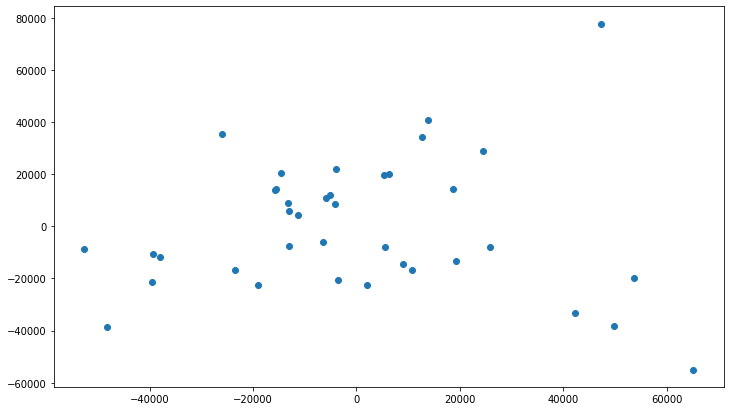

In [83]:
X_2d = PCA(n_components = 2).fit_transform(X_train)
plt.figure(figsize=(12,7))

plt.scatter(X_2d[:, 0], X_2d[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

# **SVD**

In [69]:
from sklearn.decomposition import TruncatedSVD 

svd = TruncatedSVD(n_components=5)
svd.fit(X_train)
svd.transform(X_train)

array([[ 1.92017080e+05, -2.85096550e+03,  9.23386550e+03,
        -1.31426162e+04, -2.64383005e+04],
       [ 2.08321984e+05,  1.41205811e+04,  1.41156095e+04,
         1.77722233e+04, -2.03214969e+03],
       [ 2.05831246e+05, -2.28364063e+04,  9.11162231e+03,
         4.48243655e+04, -1.58946442e+04],
       [ 1.99338471e+05, -1.17123878e+04,  3.90217428e+03,
        -1.10324272e+04, -1.49264300e+04],
       [ 2.02849195e+05,  4.30390189e+03,  2.07404460e+04,
        -3.07624276e+03,  8.62314167e+03],
       [ 1.98616112e+05, -4.40564034e+04, -1.76461913e+04,
         5.65984706e+04, -4.56546398e+03],
       [ 1.95942500e+05, -3.81430267e+04, -2.41733449e+04,
        -1.36854380e+04, -3.41237262e+04],
       [ 1.95887371e+05, -1.13940309e+04, -7.48808900e+03,
        -1.99085666e+04, -2.70930798e+04],
       [ 2.13105106e+05,  3.59087491e+03,  3.75131381e+04,
         5.63093463e+04,  7.05911889e+03],
       [ 2.00397272e+05, -1.78204352e+04,  5.08577697e+03,
         4.14911433e+04

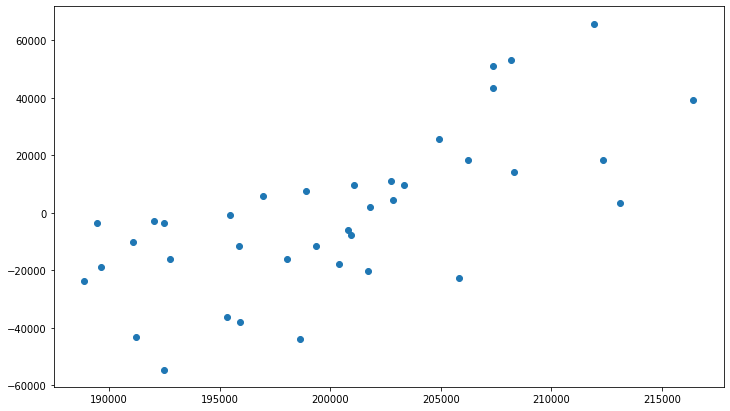

In [71]:
X_svd = TruncatedSVD(n_components=2, n_iter=5, algorithm='randomized').fit_transform(X_train)

plt.figure(figsize=(12,7))

plt.scatter(X_svd[:, 0], X_svd[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

# **TSNE**

In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced_tsne = tsne.fit_transform(X_train)

[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 38 samples in 0.000s...
[t-SNE] Computed neighbors for 38 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 38 / 38
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.927948
[t-SNE] KL divergence after 300 iterations: 0.582681


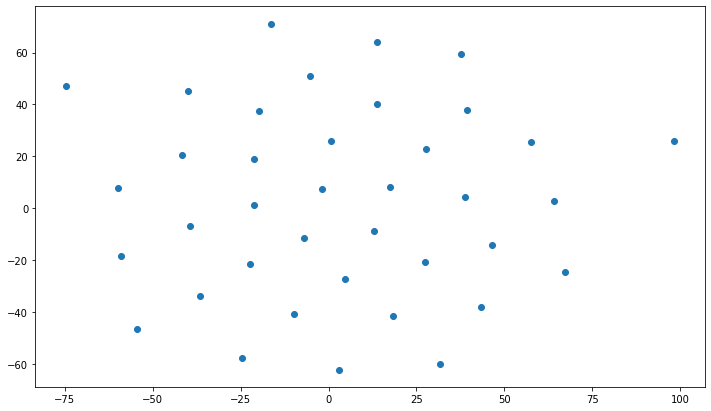

In [74]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

# **LLE**

In [75]:
from sklearn.manifold import LocallyLinearEmbedding

X_reduced_lle = LocallyLinearEmbedding(random_state=49).fit_transform(X_train)

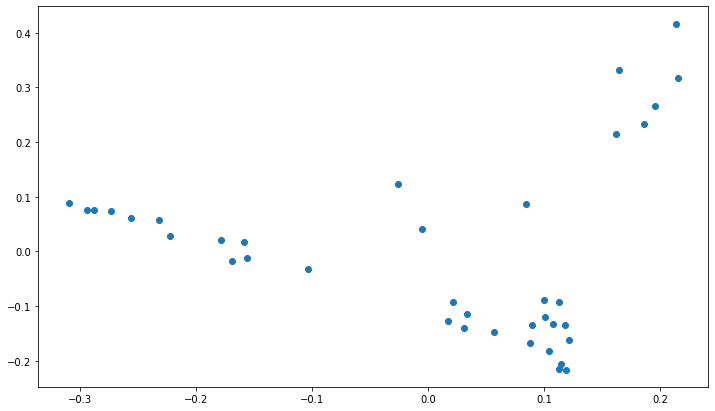

In [76]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

# **ISOMAP**

In [77]:
from sklearn.manifold import Isomap

X_reduced_isomap = Isomap(n_components=2, n_neighbors=10, n_jobs=-1).fit_transform(X_train)

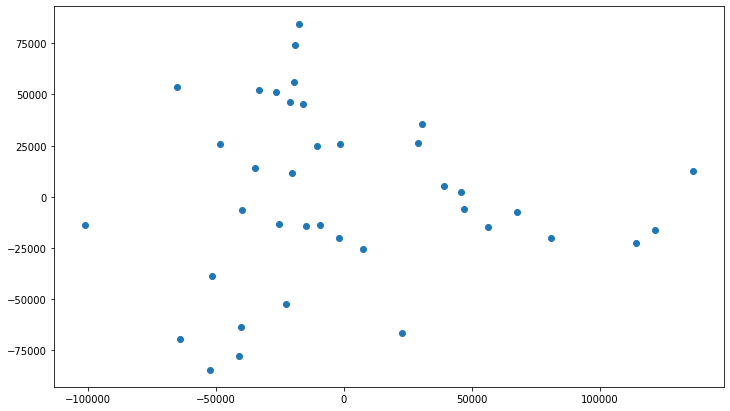

In [78]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()

# **UMAP**

In [79]:
!pip install umap-learn
import umap

     |████████████████████████████████| 86 kB 3.9 MB/s 
     |████████████████████████████████| 1.1 MB 33.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=f1c9827752fd6c1cbd7800b5d4453710988c102f515cd49b4b977a8a82695a91
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=21c8c8b0b1f8670f676db78b67d2e702aefaf0615d8528fc76704cb896631ed4
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [80]:
X_reduced_umap = umap.UMAP(n_neighbors=5).fit_transform(X_train)

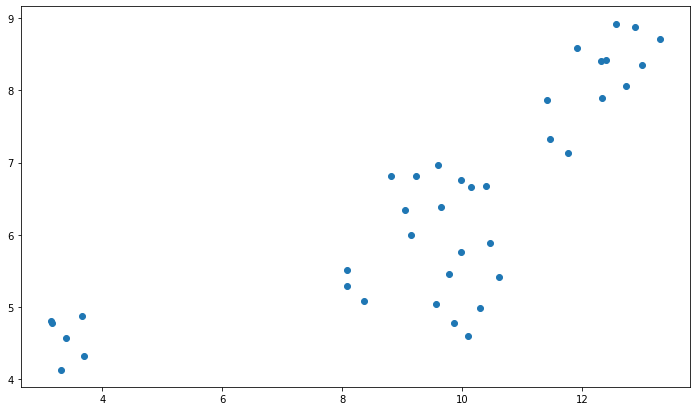

In [81]:
plt.figure(figsize=(12,7))

plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], cmap= mpl.cm.get_cmap("Paired"))
plt.show()